<a href="https://colab.research.google.com/github/Nov05/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module4-clustering/Cell_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# modified by nov05 on 2019-06-20
# DS-Unit-1-Sprint-4-Linear-Algebra-master/
# module4-clustering/

### Lecture Notebook  
https://colab.research.google.com/drive/1RdTgMEEAJGVCu-jHpwoMvxuVeUJa993a  

In [0]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
from sklearn.pipeline import Pipeline

# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [119]:
df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [120]:
target = df['diagnosis']
data = df.drop(['id', 'diagnosis','Unnamed: 32'], axis=1)
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [121]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [122]:
target.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

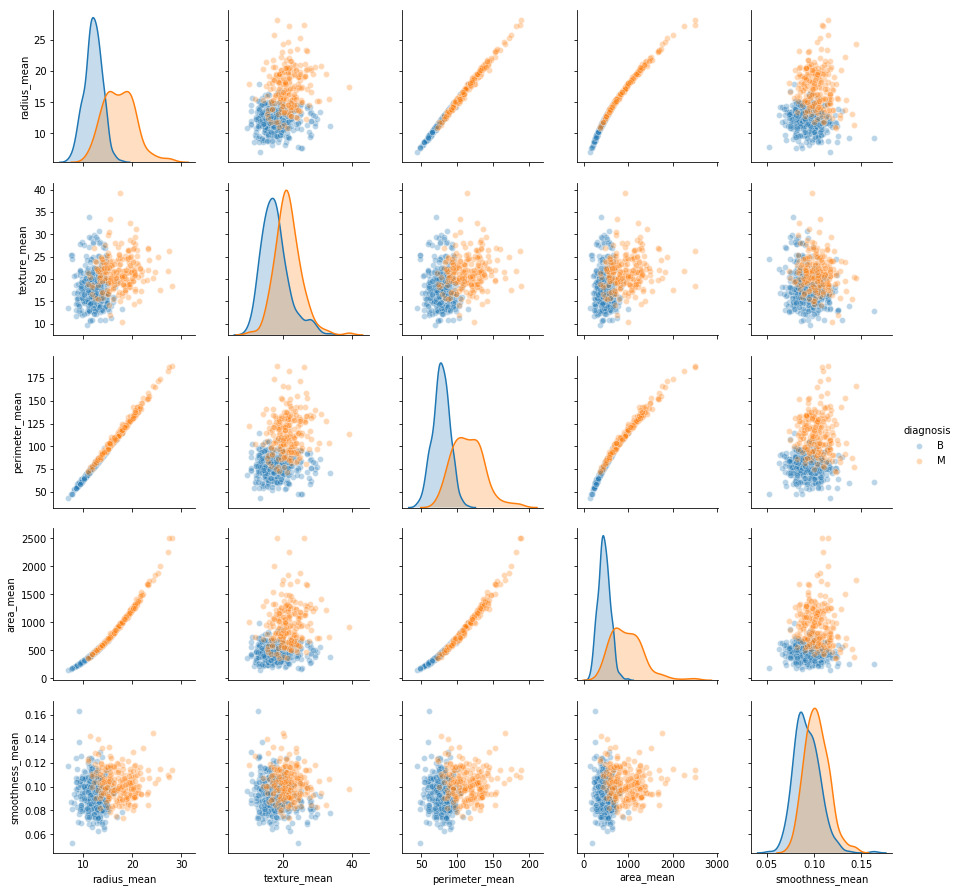

In [123]:
##### Your Code Here #####
sns.pairplot(df.iloc[:,1:7], 
             hue='diagnosis', hue_order=['B', 'M'],
             plot_kws={'alpha':0.3}
            );

In [124]:
# PCA
data_st = StandardScaler().fit_transform(data)
pca = PCA(n_components=30)
pca.fit(data_st)
data_pca = pca.fit_transform(data_st)

print("number of components:", len(pca.explained_variance_))
print(pca.explained_variance_, '\n')
print(pca.explained_variance_ratio_, '\n')
print(pca.explained_variance_ratio_.cumsum())

number of components: 30
[1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 3.12142606e-02
 3.00256631e-02 2.74877113e-02 2.43836914e-02 1.80867940e-02
 1.55085271e-02 8.19203712e-03 6.91261258e-03 1.59213600e-03
 7.50121413e-04 1.33279057e-04] 

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06] 

[0.44272026 0.63243208 0.72636371 0.79238506 0.847342

In [125]:
pipeline = Pipeline([('scaling', StandardScaler()), 
                     ('pca', PCA(n_components=6))])
data_pca = pipeline.fit_transform(data)
data_pca = pd.DataFrame(data_pca)
data_pca.head(2)

,0,1,2,3,4,5
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411426
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028655


In [126]:
# add target column for data visualization
data_pca['diagnosis'] = target
data_pca.head(2)

,0,1,2,3,4,5,diagnosis
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411426,M
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028655,M


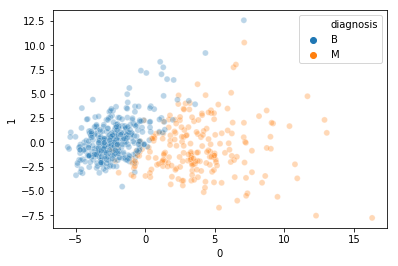

In [127]:
sns.scatterplot(x=0, y=1, data=data_pca, 
                hue='diagnosis', hue_order=['B','M'],
                alpha=0.3
               );

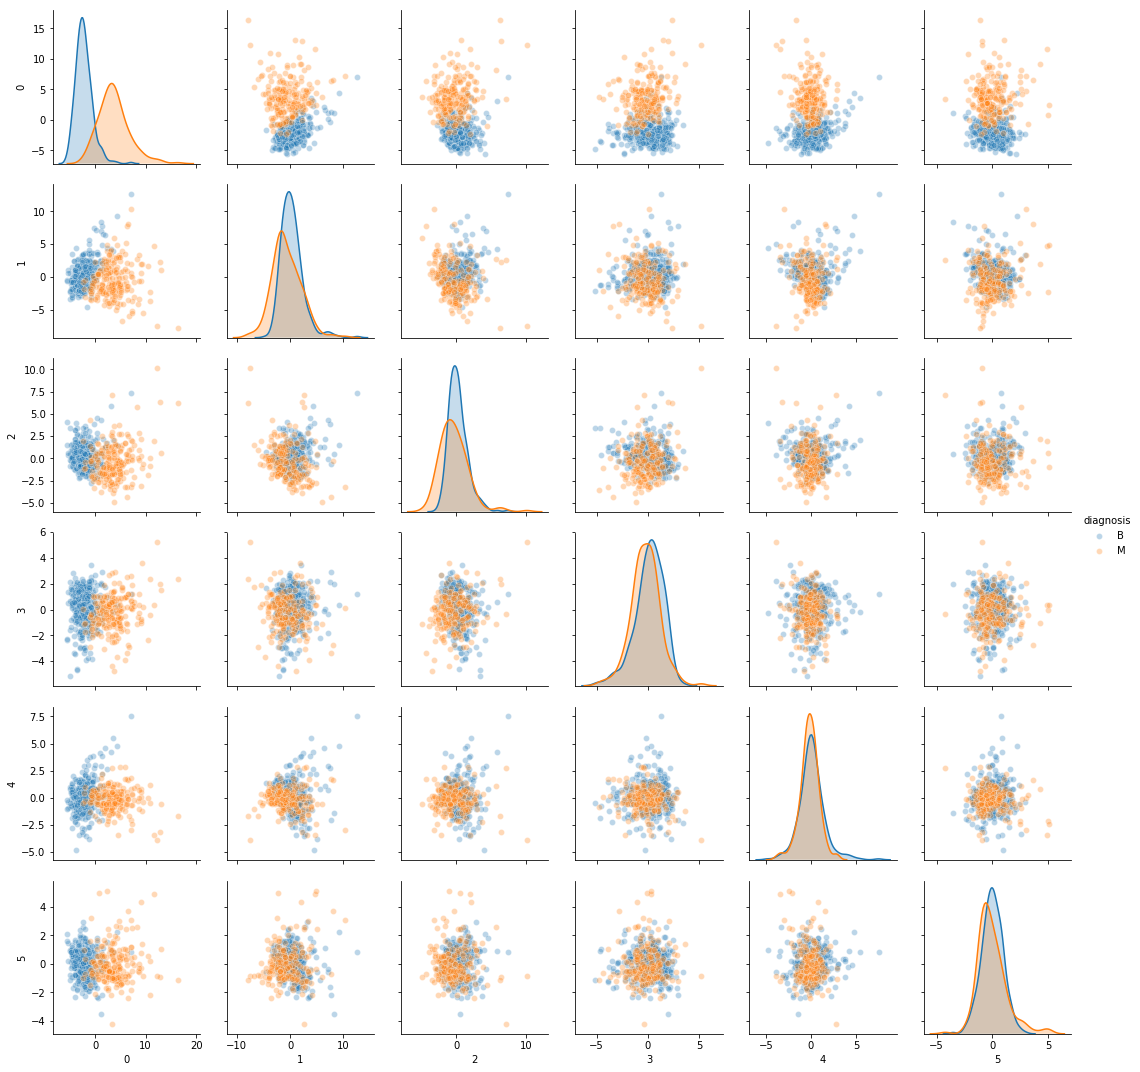

In [128]:
# 6-component PCA
sns.pairplot(data_pca, 
             hue='diagnosis', hue_order=['B', 'M'],
             plot_kws={'alpha':0.3});

In [129]:
data_pca.drop('diagnosis', axis=1, inplace=True)
data_pca.head(2)

,0,1,2,3,4,5
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411426
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028655


# Using library

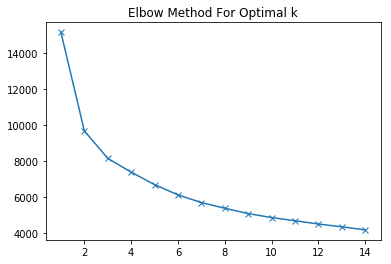

In [130]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_pca)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, marker="x")
plt.title('Elbow Method For Optimal k');

In [131]:
k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(data_pca)
labels = kmeans.labels_
print(labels[:100])

[1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0]


true benign: 0.5957820738137083 
true malignant: 0.3093145869947276 
overall accuracy: 0.9050966608084359


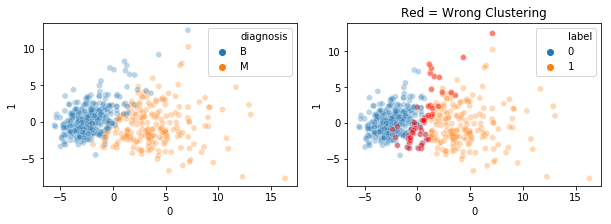

In [142]:
data_pca['diagnosis']=target
data_pca['label']=labels

# true negtive, true positive
true_B = data_pca[(data_pca['diagnosis']=='B') & 
                  (data_pca['label']==0)].shape[0] / data_pca.shape[0]
true_M = data_pca[(data_pca['diagnosis']=='M') & 
                  (data_pca['label']==1)].shape[0] / data_pca.shape[0]
print('true benign:', true_B,
      '\ntrue malignant:', true_M,
      '\noverall accuracy:', true_B+true_M)

fig, ax = plt.subplots(1,2, figsize=(10,3))
sns.scatterplot(x=0, y=1, data=data_pca, 
                hue='diagnosis', hue_order=['B','M'],
                alpha=0.3, ax=ax[0]
               );
sns.scatterplot(x=0, y=1, data=data_pca, 
                hue='label', hue_order=[0, 1],
                alpha=0.3, ax=ax[1]
               );
# plot wrong data points
condition = (((data_pca['diagnosis']=='B') & (data_pca['label']==1)) |
             ((data_pca['diagnosis']=='M') & (data_pca['label']==0))
            )
sns.scatterplot(x=0, y=1, data=data_pca[condition], 
                color='r', alpha=0.4, ax=ax[1]
               );
ax = plt.gca()
ax.set_title("Red = Wrong Clustering");

data_pca.drop(['diagnosis', 'label'], axis=1, inplace=True)

# Iterate by Hand

In [96]:
center = [data_pca[col].mean() for col in data_pca]
centroids = []
centroids.append(data_pca.sample(k).values)
print(center)
print(centroids[0][0])
print(centroids[0][1])

[4.386258979538404e-16, 3.51212907614285e-17, 4.838933393796816e-17, 1.2565617361311087e-16, -2.648730678257733e-17, 5.853548460238084e-18]
[-1.45533052  0.59194287  1.14634037  0.07901721  1.08773807  1.05797834]
[-2.70839397 -0.21966574 -0.31450475  0.05525292 -0.04825397  0.16910167]


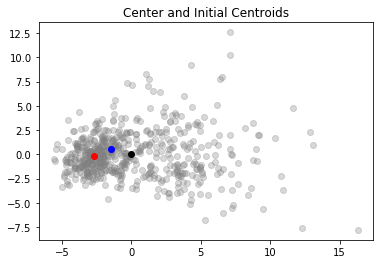

In [97]:
plt.scatter(data_pca[0], data_pca[1], color='gray', alpha=0.3)
plt.plot(center[0], center[1], "ok")
plt.plot(centroids[0][0][0], centroids[0][0][1], "ob")
plt.plot(centroids[0][1][0], centroids[0][1][1], "or")
plt.title("Center and Initial Centroids")
plt.show()

In [0]:
def distance(p1, p2):
  return(sum((x-y)**2 for x,y in zip(p1,p2))**0.5)

def cluster(p, centroids):
  return(np.argmin([distance(p, c) for c in centroids]))

########################################################
#                 K-Means 
########################################################
def kmeans(df, k=k, iterate=1000):
  
  colnum = df.shape[1]
  
  # initial centroids
  centroids = []
  centroids.append(df.sample(k).values)
  
  # find new centroids
  for i in range(iterate):
    colname = "c" + str(i)
    df[colname] = (df.iloc[:,:colnum]
                     .apply(cluster, 
                            centroids=centroids[i],
                            axis=1))
    means = []
    for j in range(k):
      subset = df[df[colname]==j].iloc[:,:colnum]
      means.append([subset[col].mean() for col in subset])
    
    means = np.array(means)
    if np.array_equal(centroids[-1], means): 
      break
    else:
      centroids.append(means)
      
  return(centroids, df)
########################################################

In [99]:
print(distance(centroids[0][0], centroids[0][1]))
print(cluster(center, centroids[0]))
print(cluster([9]*6, centroids[0]))

2.538521106247898
0
0


In [100]:
data_pca = data_pca.iloc[:,:6]
c, _ = kmeans(df=data_pca)
print(len(c))
print(c[0])
data_pca.sample(10)

7
[[ 3.93530207 -1.94807156  1.3897667   2.94063921  0.54674676 -1.22650675]
 [-1.63838494  1.71594912  0.43420629 -1.52796611 -1.76938043 -1.50319245]]


,0,1,2,3,4,5,c0,c1,c2,c3,c4,c5,c6
140,-5.015009,0.574700,-0.842438,2.169663,-0.882003,0.931935,1,1,1,1,1,1,1
57,2.176863,0.972116,-1.943888,-0.737318,-0.395782,0.462345,1,0,0,0,0,0,0
418,-2.921878,-0.009213,-0.901303,1.791329,0.576982,-0.239811,1,1,1,1,1,1,1
520,-1.292637,4.964225,0.345927,2.240535,-3.840531,-0.548617,1,1,1,1,1,1,1
539,-1.142832,5.599458,1.301037,-2.188249,0.765578,-1.159217,1,1,1,1,1,1,1
531,-1.773585,0.804210,-2.027918,-0.687333,-0.616091,-0.289329,1,1,1,1,1,1,1
201,1.649461,-2.102291,-0.975272,0.188044,0.916827,-0.329703,0,0,0,0,0,0,0
425,-4.703042,-0.432302,0.005305,-1.370608,-0.085098,-0.330068,1,1,1,1,1,1,1
474,-1.990529,1.899463,-2.030998,0.911905,1.231552,-0.419629,1,1,1,1,1,1,1
292,-1.420223,1.393978,-0.836987,1.105445,-0.364399,0.089468,1,1,1,1,1,1,1


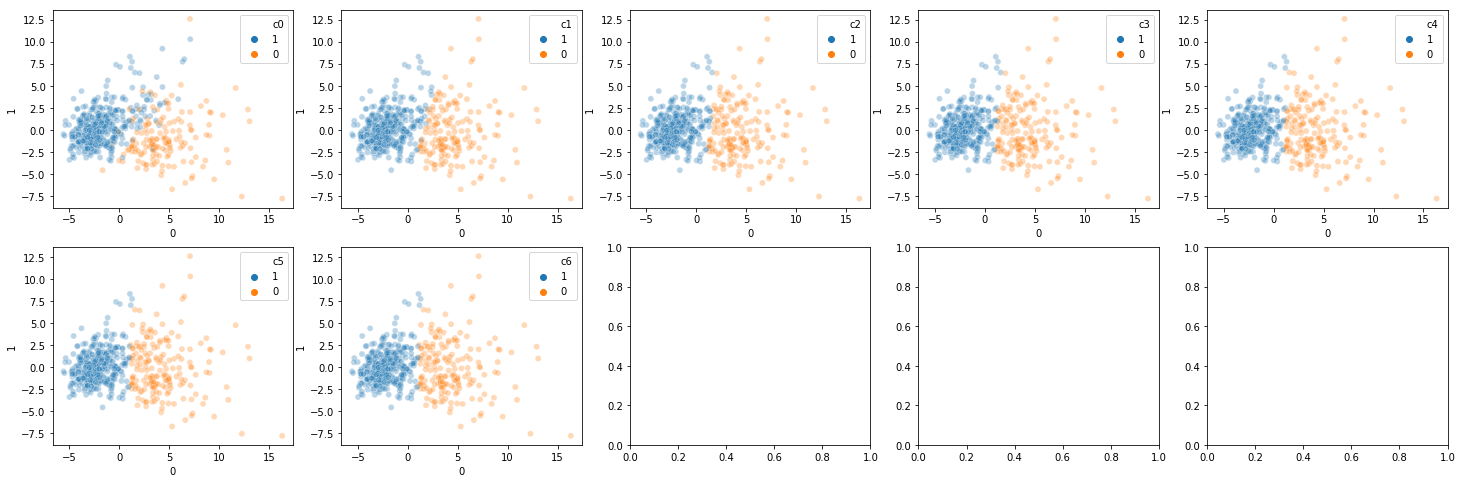

In [112]:
def kmeans_plot(data=data_pca, n_component=6, colnum=5):
  plotnum = data.shape[1] - n_component
  rownum = math.ceil(plotnum / 5)
  fig, ax = plt.subplots(rownum, 5, figsize=(5*colnum, 4*rownum))
  for i in range(plotnum):
    sns.scatterplot(x=0, y=1, data=data, 
                    hue='c'+str(i), hue_order=[1, 0],
                    alpha=0.3,
                    ax=ax[math.floor(i/5), i-math.floor(i/5)*5]
                   );
kmeans_plot()

true benign: 0.6045694200351494 
true malignant: 0.30755711775043937 
overall accuracy: 0.9121265377855887


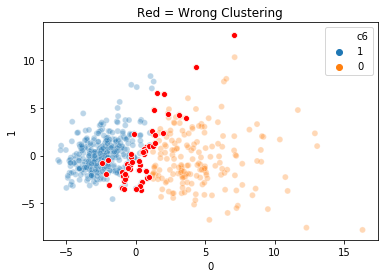

In [116]:

colname = data_pca.columns.tolist()[-1]
data_pca['diagnosis'] = target

# true negtive, true positive
true_B = data_pca[(data_pca['diagnosis']=='B') & 
                  (data_pca[colname]==1)].shape[0] / data_pca.shape[0]
true_M = data_pca[(data_pca['diagnosis']=='M') & 
                  (data_pca[colname]==0)].shape[0] / data_pca.shape[0]
print('true benign:', true_B,
      '\ntrue malignant:', true_M,
      '\noverall accuracy:', true_B+true_M)

# plot wrong data points
condition = (((data_pca['diagnosis']=='B') & (data_pca[colname]==0)) |
             ((data_pca['diagnosis']=='M') & (data_pca[colname]==1))
            )
sns.scatterplot(x=0, y=1, data=data_pca, 
                hue=colname, hue_order=[1, 0],
                alpha=0.3
               );
sns.scatterplot(x=0, y=1, data=data_pca[condition], 
                color='r', alpha=1
               );
ax = plt.gca()
ax.set_title("Red = Wrong Clustering");

data_pca.drop('diagnosis', axis=1, inplace=True)

# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to **check how accurate your clustering was**. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.

In [0]:
# did it in the previous code blocks